In [ ]:
#Mount to my working drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import and check my folder contain the dataset
%cd "/content/drive/MyDrive/Project Data Analysis"
!ls

/content/drive/MyDrive/Project Data Analysis
 AgeProducts.xlsx				     marketing_campaign.gsheet
'Bìa & Intro.docx'				    'Places & Promotion.docx'
'Check Grammarly.gdoc'				     Preprocessing.docx
 Cluster.docx					     Product.docx
 Cluster.xlsx					    'Script Presentation.gdoc'
 Complain.xlsx					    'Table of Content.docx'
'Data Analysis Project_ Customer Personality.docx'   Tú
 marketing_campaign.csv


In [ ]:
#Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.style as style
import seaborn as sns

In [ ]:
#Import dataset
data = pd.read_csv("marketing_campaign.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Check the numbers
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Preprocessing dataset**


In [ ]:
data.drop('ID', axis=1, inplace=True)

In [ ]:
#Create new dataframe
info = data.copy()
#Null
info = info.dropna()
#Add new columns
info['Age'] = 2015 - info.Year_Birth
info['Dt_Customer'] = pd.to_datetime(info['Dt_Customer'])
info['Month_Customer'] = 12.0 * (2015 - info.Dt_Customer.dt.year ) + (1 - info.Dt_Customer.dt.month)
info['TotalSpendings'] =  info.MntWines + info.MntFruits + info.MntMeatProducts + info.MntFishProducts + info.MntSweetProducts + info.MntGoldProds
info['Children'] = info['Kidhome'] + info['Teenhome']
info.Education = info.Education.replace({'2n Cycle': 'Master'})
info.Marital_Status = info.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
info["Has_Child"] = np.where(info.Children > 0, "Has Child", "No Child")
#Outliers
info = info[info.Age < 100]
info = info[info.Income < 120000]
info = info.drop(columns=[ 'Year_Birth','Recency', 'NumDealsPurchases', 
       'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']) 
info.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Month_Customer,TotalSpendings,Children,Has_Child
0,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,172,88,88,58,33.0,1617,0,No Child
1,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,2,1,6,61,5.0,27,2,Has Child
2,Graduation,Partner,71613.0,0,0,2013-08-21,426,49,127,111,21,42,50,17.0,776,0,No Child
3,Graduation,Partner,26646.0,1,0,2014-10-02,11,4,20,10,3,5,31,3.0,53,1,Has Child
4,PhD,Partner,58293.0,1,0,2014-01-19,173,43,118,46,27,15,34,12.0,422,1,Has Child


In [ ]:
info.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Month_Customer,TotalSpendings,Children
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,46.095692,18.143764,606.821769,0.948753
std,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,11.705801,7.670134,601.675284,0.749231
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,5.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,38.000000,13.000000,69.000000,0.000000
50%,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,45.000000,18.000000,397.000000,1.000000
75%,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,56.000000,24.000000,1047.000000,1.000000
max,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,75.000000,36.000000,2525.000000,3.000000


In [ ]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Education         2205 non-null   object        
 1   Marital_Status    2205 non-null   object        
 2   Income            2205 non-null   float64       
 3   Kidhome           2205 non-null   int64         
 4   Teenhome          2205 non-null   int64         
 5   Dt_Customer       2205 non-null   datetime64[ns]
 6   MntWines          2205 non-null   int64         
 7   MntFruits         2205 non-null   int64         
 8   MntMeatProducts   2205 non-null   int64         
 9   MntFishProducts   2205 non-null   int64         
 10  MntSweetProducts  2205 non-null   int64         
 11  MntGoldProds      2205 non-null   int64         
 12  Age               2205 non-null   int64         
 13  Month_Customer    2205 non-null   float64       
 14  TotalSpendings    2205 n

Model

In [ ]:
#Prepare the dataset before modeling it
X = info.drop(['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Has_Child'], axis=1)
X.head()

,Income,Age,Month_Customer,TotalSpendings,Children
0,58138.0,58,33.0,1617,0
1,46344.0,61,5.0,27,2
2,71613.0,50,17.0,776,0
3,26646.0,31,3.0,53,1
4,58293.0,34,12.0,422,1


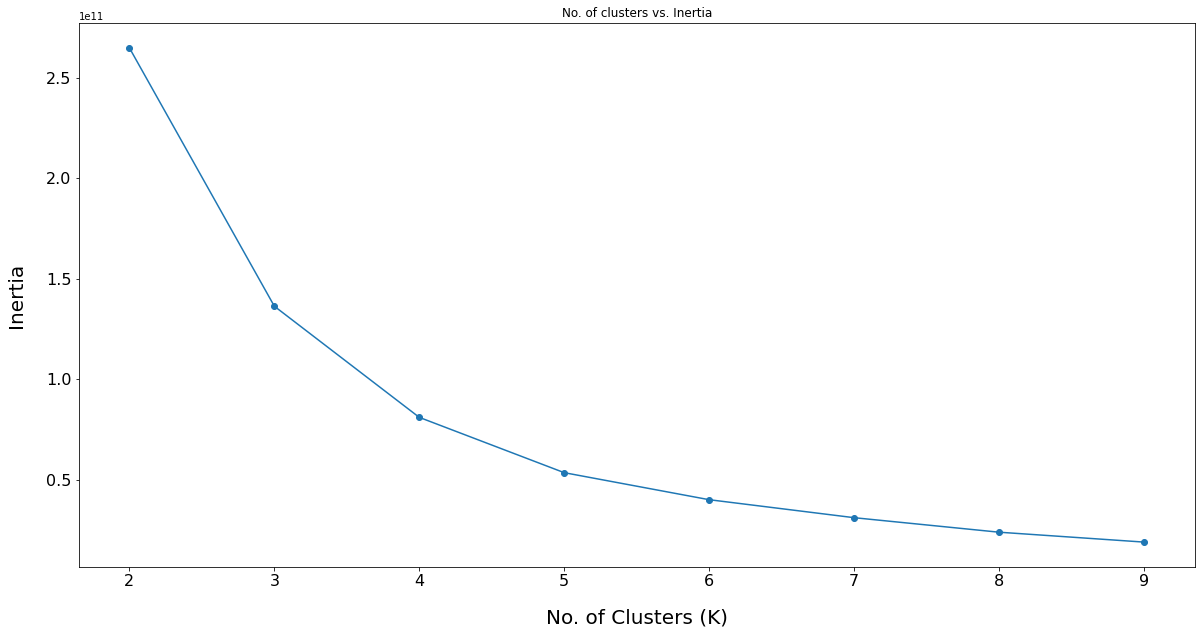

In [ ]:
#Plot the Elbow method
from sklearn.cluster import KMeans

options = range(2,10)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

In [ ]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

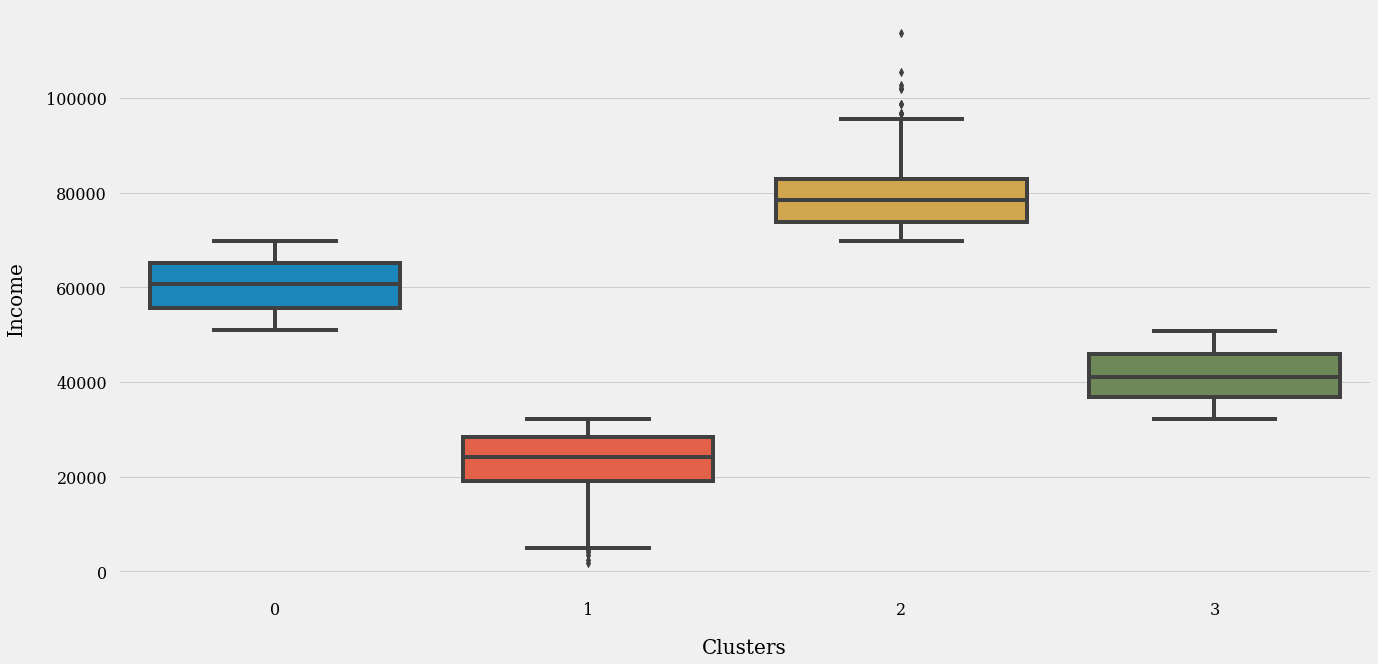

In [ ]:
#Identify each customer group by income
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

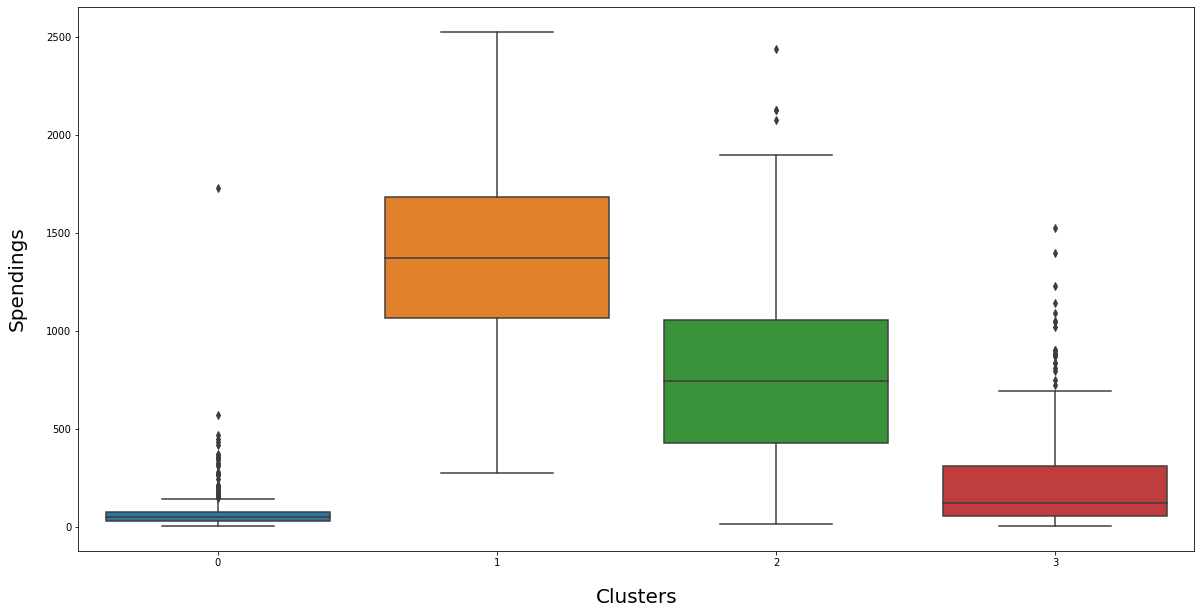

In [ ]:
#Identify each customer group by total spending
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

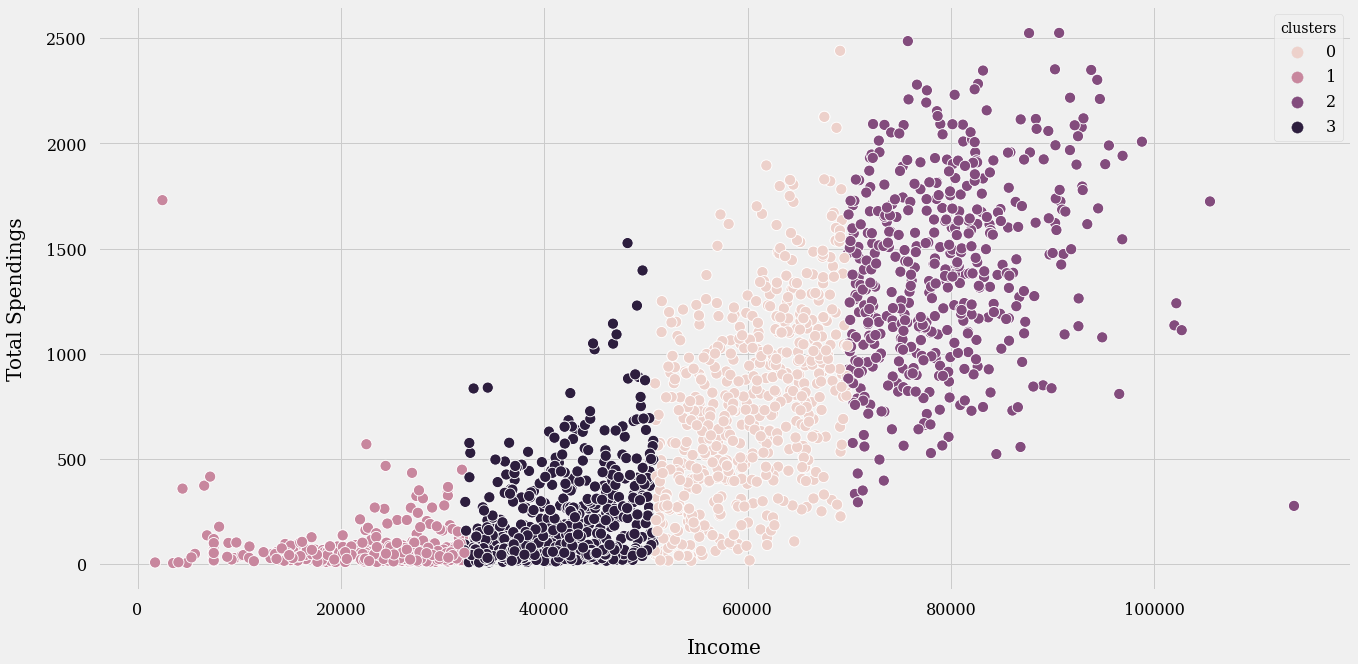

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer_kmeans, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

In [ ]:
#Assign the name for each cluster
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

info['clusters'] = customer_kmeans.clusters

# **Check the information of each cluster**

Cluster 2, Platinum

In [ ]:
cluster2 = customer_kmeans[customer_kmeans.clusters == 'Platinum']
cluster2.describe()

,Income,Age,Month_Customer,TotalSpendings,Children
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,79243.243564,47.180198,17.603960,1385.657426,0.342574
std,6953.608252,12.817600,7.629412,436.327576,0.590491
min,69867.000000,20.000000,1.000000,277.000000,0.000000
25%,73691.000000,38.000000,12.000000,1073.000000,0.000000
50%,78416.000000,47.000000,17.000000,1376.000000,0.000000
75%,82800.000000,57.000000,23.000000,1686.000000,1.000000
max,113734.000000,74.000000,36.000000,2525.000000,3.000000


In [ ]:
print("total spending Platinum:", sum(cluster2.TotalSpendings))
print("total income Platinum:", sum(cluster2.Income))

total spending Platinum: 699757
total income Platinum: 40017838.0


Có 3 con: 4-----
Có 2 con: 19-----
Có 1 con: 123-----
Không có con  nào: 359

Cluster 0, Gold


In [ ]:
cluster0 = customer_kmeans[customer_kmeans.clusters == 'Gold']
cluster0.describe()

,Income,Age,Month_Customer,TotalSpendings,Children
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,60455.445351,49.386623,18.588907,769.324633,1.019576
std,5428.303443,10.899224,7.824088,433.734981,0.680932
min,50870.000000,23.000000,1.000000,16.000000,0.000000
25%,55686.000000,41.000000,13.000000,436.000000,1.000000
50%,60631.000000,49.000000,19.000000,747.000000,1.000000
75%,65196.000000,59.000000,24.000000,1053.000000,1.000000
max,69805.000000,75.000000,36.000000,2440.000000,3.000000


In [ ]:
print("total spending Gold:", sum(cluster0.TotalSpendings))
print("total income Gold:", sum(cluster0.Income))

total spending Gold: 471596
total income Gold: 37059188.0


Có 3 con: 14-----
Có 2 con: 106-----
Có 1 con: 371-----
Không có con nào: 122

Cluster 3, Silver

In [ ]:
cluster3 = customer_kmeans[customer_kmeans.clusters == 'Silver']
cluster3.describe()

,Income,Age,Month_Customer,TotalSpendings,Children
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,41246.848910,46.042056,17.819315,208.908100,1.328660
std,5334.693912,10.906629,7.574800,219.212623,0.697279
min,32146.000000,20.000000,1.000000,8.000000,0.000000
25%,36746.500000,39.000000,12.000000,54.000000,1.000000
50%,41030.000000,44.000000,18.000000,122.500000,1.000000
75%,45976.250000,54.750000,23.750000,311.750000,2.000000
max,50785.000000,72.000000,35.000000,1526.000000,3.000000


Cluster 1, Bronze

In [ ]:
print("total spending Silver:", sum(cluster3.TotalSpendings))
print("total income Silver:", sum(cluster3.Income))

total spending Silver: 134119
total income Silver: 26480477.0


Có 3 con: 26----- Có 2 con: 218----- Có 1 con: 339----- Không có con nào: 59

In [ ]:
cluster1 = customer_kmeans[customer_kmeans.clusters == 'Bronze']
cluster1.describe()

,Income,Age,Month_Customer,TotalSpendings,Children
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("total spending Bronze:", sum(cluster1.TotalSpendings))
print("total income Bronze:", sum(cluster1.Income))

total spending Bronze: 0
total income Bronze: 0


Có 3 con: 6----- Có 2 con: 72----- Có 1 con: 279----- Không có con nào: 88

In [ ]:
cluster1[cluster1.Children == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          0 non-null      float64
 1   Age             0 non-null      int64  
 2   Month_Customer  0 non-null      float64
 3   TotalSpendings  0 non-null      int64  
 4   Children        0 non-null      int64  
 5   clusters        0 non-null      object 
dtypes: float64(2), int64(3), object(1)
memory usage: 0.0+ bytes


# **Check Age Group**

In [ ]:
customer=info.copy()

In [ ]:
customer.loc[ (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] >= 60), 'AgeGroup'] = 'Senior Adult'

In [ ]:
customer = customer.iloc[:, 6:]
customer = customer.drop(columns=['Age', 'Month_Customer','Children', 'Has_Child' ])

In [ ]:
customer.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpendings,AgeGroup
0,635,88,546,172,88,88,1617,Middle Age Adult
1,11,1,6,2,1,6,27,Senior Adult
2,426,49,127,111,21,42,776,Middle Age Adult
3,11,4,20,10,3,5,53,Adult
4,173,43,118,46,27,15,422,Adult
